# Mini project - Air BNB
This miniproject will look into what determines the *price* of a **spare room** in a New York city apartement. What can we do to effect the price? The dataset is from kaggle and called [AirBNB_Data](https://www.kaggle.com/datasets/paramvir705/airbnb-data). The Dataset contains a variety of featrues that describes each listing, from hostfeatures e.g how long they have been hosting,amount of reviews,review scores, the listing itself with location,neigbourhood,zipcode,room type that the host cant change, as well as amenities the host can include e.g internet,tv. 



This mini project will focus on the data science steps. The Data Science process. But before the first step is creating an envioronment in python. *YData-profiling* is then used to get a overview of the data, if there are missing values, how many rows,columns,unique values etc in a html summary report. 


# creating envioronment
1. in terminal run to create enviornment
    1. python -m venv venv
    2. venv\Scripts\activate 
    3. pip install pandas matplotlib seaborn jupyter plotly sci-learn ....
    4. python -m ipykernel install --user --name=venv
2. choose venv in this file for the correct environment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRFRegressor , XGBRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

# The DS process
- Define the goal
- Collect and manage data
- Build the model
- Evaluate and critique the model
- Present results and document
- Deploy model


## Define the goal
The goal in mind is finding out what factors determines the price on a spare room. What factors the host can change, e.g how fast the host respond, description, if the host has a profile picture,thumbnail,cancellation policy. Espacially those that might be easy to change, like amenities thats included in the lising. 

The questions then is:
- What effects the price  for **private room** listings, and what can the host do to increase price?
- How much of the price variation can be explained by the features that the host can influence?
 
### Goal
- How much should we charge for our spare room?
- can we increase the price for our spare room
- Increase the price by 0.25 log

### Hypothesis of things that may affect price
- More amenities increases price
- Higer host response rate increases the price
- instant bookable increases price
- Better reviews increase price

### DS cycle
- In the DS cycle the *sponsor* then is the future/new Airbnb host. 
- The *client* then is the users of Airbnb aswell as the host.

# Data collection and managment

The Dataset used is availible on Kaggle and is undeer Apache 2.0 license. To be able to answear our questions the first step is to explore the data.  

- [Load in the data](#load-in-dataset)
- [What data is available?](#inspect-data)

## Narrow down the data
To focus on the goal, the first thing is to filter on relevant data.
To avoid garbage output, the next step is to clean the input so no garbage will be in the input.
1. [focus on the column ``city`` on **New york**,column ``room_type`` on **private room**.](#focus-on-private-room-in-nyc)
2. [Drop uneccesary columns](#drop-columns)
3. [Handle missing values](#missing-values)


## Feature extraction
From the [amenities column description create columns](#extract-amenities) from the most common amenities listed.


### Load in Dataset

In [87]:
df = pd.read_csv('Airbnb_Data.csv')

### Inspect data

In [88]:
df.head(1)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

#### Stats

In [90]:
df.describe()           

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


Explore how many diffrent *ids* there are.

Then loop trough the columns rows to find the number of diffrent objects.

In [91]:
print("Number of ids: ",df.id.nunique())
for col in df.select_dtypes(include=['object']).columns:
    print(col, df[col].nunique())

Number of ids:  74111
property_type 35
room_type 3
amenities 67122
bed_type 5
cancellation_policy 5
city 6
description 73479
first_review 2554
host_has_profile_pic 2
host_identity_verified 2
host_response_rate 80
host_since 3087
instant_bookable 2
last_review 1371
name 73359
neighbourhood 619
thumbnail_url 65883
zipcode 769


In [92]:
for col in ['city','cancellation_policy','host_has_profile_pic','host_identity_verified','property_type','room_type','bed_type']:
    print(col, df[col].unique(),"\n")

city ['NYC' 'SF' 'DC' 'LA' 'Chicago' 'Boston'] 

cancellation_policy ['strict' 'moderate' 'flexible' 'super_strict_30' 'super_strict_60'] 

host_has_profile_pic ['t' nan 'f'] 

host_identity_verified ['t' 'f' nan] 

property_type ['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse' 'Dorm' 'Other'
 'Camper/RV' 'Villa' 'Boutique hotel' 'Timeshare' 'In-law' 'Boat'
 'Serviced apartment' 'Castle' 'Cabin' 'Treehouse' 'Tipi' 'Vacation home'
 'Tent' 'Hut' 'Casa particular' 'Chalet' 'Yurt' 'Earth House'
 'Parking Space' 'Train' 'Cave' 'Lighthouse' 'Island'] 

room_type ['Entire home/apt' 'Private room' 'Shared room'] 

bed_type ['Real Bed' 'Futon' 'Pull-out Sofa' 'Couch' 'Airbed'] 



In our scenario we  have a spare room, which we have 30638 availible in the dataset.

In [93]:
print(df['room_type'].value_counts())

room_type
Entire home/apt    41310
Private room       30638
Shared room         2163
Name: count, dtype: int64


In [94]:
print(df['city'].value_counts())

city
NYC        32349
LA         22453
SF          6434
DC          5688
Chicago     3719
Boston      3468
Name: count, dtype: int64


## Focus on Private room in NYC

Filter *room_type* on *private room*

In [95]:
df_private = df[df['room_type'] == "Private room"]
df_nyc_private = df_private[df_private['city'] == 'NYC'].copy()
df_nyc_private = df_nyc_private[df_nyc_private['property_type'] =='Apartment']
for col in ['city','cancellation_policy','host_has_profile_pic','host_identity_verified','room_type','bed_type']:
    print(col, df_nyc_private[col].value_counts(),"\n")

city city
NYC    12627
Name: count, dtype: int64 

cancellation_policy cancellation_policy
flexible    4852
strict      4702
moderate    3073
Name: count, dtype: int64 

host_has_profile_pic host_has_profile_pic
t    12506
f       35
Name: count, dtype: int64 

host_identity_verified host_identity_verified
t    7811
f    4730
Name: count, dtype: int64 

room_type room_type
Private room    12627
Name: count, dtype: int64 

bed_type bed_type
Real Bed         12209
Futon              191
Pull-out Sofa      112
Airbed              96
Couch               19
Name: count, dtype: int64 



### Drop columns
Decide to drop columns *bedtype* since majority have a real bed, drop *host has profile pic* aswell as only 90 doesnt have one. 

In [96]:
df_nyc_private.drop(['id','bed_type','host_has_profile_pic'],axis=1,inplace=True)

## Missing values
Remove values that are reasonble to remove. e.g *Bathrooms* na and *neighbourhood*, and *bedrooms* can reasonbly be **removed**.

However *host_identity_verified* and *first_review*, *thumbnail_url* probebly means that there is no data or false. 

The na on *review_scores_rating* is probably that no one have reviewed that host yet. 

In [97]:
# na or missing values
for col in df_nyc_private:
    if df_nyc_private[col].isna().sum() > 0:
        print(col,"\nna: ", df_nyc_private[col].isna().sum())
        print("null: ",df_nyc_private[col].isnull().sum(),"\n")

bathrooms 
na:  52
null:  52 

first_review 
na:  3118
null:  3118 

host_identity_verified 
na:  86
null:  86 

host_response_rate 
na:  4328
null:  4328 

host_since 
na:  86
null:  86 

last_review 
na:  3108
null:  3108 

neighbourhood 
na:  1
null:  1 

review_scores_rating 
na:  3351
null:  3351 

thumbnail_url 
na:  1018
null:  1018 

zipcode 
na:  166
null:  166 

bedrooms 
na:  7
null:  7 

beds 
na:  36
null:  36 



### Handeling data and missing values
Missing or na values within **bathrooms** , **bedrooms**, **beds**, **host_since** and **neighbourhood** will be removed. 

Missing or na values in **host_identity_verified** will be set to f for false 

For **review_scores_rating** , create additional column for no reviews. Asume the median in the review score for na values

Change **thumbnail_url** to new column, thumbnail bool

**last_review**,**first_review** and **zipcode** might be dropped later since we already have reviews and location.

Change host **response rate** to float from object

In [ ]:
# drop rows containing unreasonble na cells. Total 100 rows dropped.
df_nyc_private = df_nyc_private.dropna(subset=['bathrooms','bedrooms','beds','host_since','neighbourhood'])
# host_identity_verified is reasonbly not na or null but false, change to f
df_nyc_private['host_identity_verified'] = df_nyc_private['host_identity_verified'].fillna('f')

# Host has no thumbnail, True/false instead
df_nyc_private['thumbnail_url'] = (~df_nyc_private['thumbnail_url'].isna()).astype(int)

# median score for na in review score
df_nyc_private['review_scores_rating'] = df_nyc_private['review_scores_rating'].fillna(df_nyc_private['review_scores_rating'].median())
# New column for no reviews
df_nyc_private['review_scores'] = (~df_nyc_private['review_scores_rating'].isna()).astype(int)

# first/last review null same as no review
df_nyc_private = df_nyc_private.drop(['first_review','last_review'],axis=1)

# Drop columns:zipcode as we already have long and lat, drop city,room_type,property_type as we already specify nyc, drop name and description 
df_nyc_private = df_nyc_private.drop(['zipcode','city','name','description','room_type','property_type'],axis=1)

# remove % from response rate
df_nyc_private['host_response_rate'] = df_nyc_private['host_response_rate'].str.replace('%','').astype(float)

df_nyc_private['host_response_rate'] = df_nyc_private['host_response_rate'].fillna(0)
df_nyc_private.info()
df_nyc_private.head()


<class 'pandas.core.frame.DataFrame'>
Index: 12464 entries, 10 to 74106
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               12464 non-null  float64
 1   amenities               12464 non-null  object 
 2   accommodates            12464 non-null  int64  
 3   bathrooms               12464 non-null  float64
 4   cancellation_policy     12464 non-null  object 
 5   cleaning_fee            12464 non-null  bool   
 6   host_identity_verified  12464 non-null  object 
 7   host_response_rate      12464 non-null  float64
 8   host_since              12464 non-null  object 
 9   instant_bookable        12464 non-null  object 
 10  latitude                12464 non-null  float64
 11  longitude               12464 non-null  float64
 12  neighbourhood           12464 non-null  object 
 13  number_of_reviews       12464 non-null  int64  
 14  review_scores_rating    12464 non-null  fl

,log_price,amenities,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,bedrooms,beds,review_scores
10,4.605170,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,strict,True,t,100.0,2013-03-27,f,40.723883,-73.983880,Alphabet City,82,93.0,1,1.0,1.0,1
29,4.653960,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,strict,True,f,68.0,2016-03-06,f,40.750355,-73.980828,Murray Hill,40,88.0,1,1.0,2.0,1
30,4.317488,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,strict,True,t,67.0,2014-01-06,f,40.661221,-73.948667,Lefferts Garden,1,100.0,1,1.0,1.0,1
35,4.382027,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2,1.0,moderate,True,t,90.0,2012-08-07,t,40.659219,-73.913513,Brownsville,17,96.0,1,1.0,1.0,1
37,3.912023,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1,1.0,strict,True,f,86.0,2013-11-19,f,40.715183,-73.945200,Williamsburg,11,84.0,1,1.0,1.0,1


### Extract amenities

In [99]:
# seperates to amenities to string by ","
df_nyc_private['amenities'] = (
    df_nyc_private['amenities']
    .str.replace(r'[\{\}"]', '', regex=True)   
    .str.split(',')                           
)


In [ ]:
# explode the amenities to seprate lsit
common_amenities = df_nyc_private['amenities'].explode().value_counts().head(15).index.to_list()

# crate new columns with amenities
for amenity in common_amenities:
    col_name = 'amanity_' + amenity
    df_nyc_private[col_name] = df_nyc_private['amenities'].apply(lambda x: int(amenity in x))

# Drop amenities description
df_nyc_private = df_nyc_private.drop(['amenities'],axis=1)
df_nyc_private.head() 

,log_price,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,...,amanity_Smoke detector,amanity_Hangers,amanity_Carbon monoxide detector,amanity_Shampoo,amanity_TV,amanity_Internet,amanity_Laptop friendly workspace,amanity_Hair dryer,amanity_Iron,amanity_translation missing: en.hosting_amenity_50
10,4.605170,2,1.0,strict,True,t,100.0,2013-03-27,f,40.723883,...,1,1,0,0,0,1,1,1,0,1
29,4.653960,3,1.0,strict,True,f,68.0,2016-03-06,f,40.750355,...,0,1,0,1,1,1,1,1,1,1
30,4.317488,2,1.0,strict,True,t,67.0,2014-01-06,f,40.661221,...,1,1,1,1,1,1,1,1,1,0
35,4.382027,2,1.0,moderate,True,t,90.0,2012-08-07,t,40.659219,...,1,0,1,1,1,0,0,0,1,0
37,3.912023,1,1.0,strict,True,f,86.0,2013-11-19,f,40.715183,...,1,1,1,1,1,0,1,1,1,0


In [101]:
df_nyc_private.drop(['bathrooms'],axis=1)
df_nyc_private.head()

,log_price,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,...,amanity_Smoke detector,amanity_Hangers,amanity_Carbon monoxide detector,amanity_Shampoo,amanity_TV,amanity_Internet,amanity_Laptop friendly workspace,amanity_Hair dryer,amanity_Iron,amanity_translation missing: en.hosting_amenity_50
10,4.605170,2,1.0,strict,True,t,100.0,2013-03-27,f,40.723883,...,1,1,0,0,0,1,1,1,0,1
29,4.653960,3,1.0,strict,True,f,68.0,2016-03-06,f,40.750355,...,0,1,0,1,1,1,1,1,1,1
30,4.317488,2,1.0,strict,True,t,67.0,2014-01-06,f,40.661221,...,1,1,1,1,1,1,1,1,1,0
35,4.382027,2,1.0,moderate,True,t,90.0,2012-08-07,t,40.659219,...,1,0,1,1,1,0,0,0,1,0
37,3.912023,1,1.0,strict,True,f,86.0,2013-11-19,f,40.715183,...,1,1,1,1,1,0,1,1,1,0


# Exploratory Data Analysis - Visualisation

Find out how the data is distributed in variables and features, potentionally identifiying issues regarding the dataset. [Create histograms](#histogram-for-numeric-values) for the numerical variables. The price is in log scale which might have reduced the amount of outliers in that column. The number of reviews is skewed, with most of the listings having few, thus a log scale was used. The reviews itself is skewed to higher ratings.

For the categorical values,*cancellation policy*, *host identity verified* and *instant bookable* was [countplots](#countplot-for-categorical-values) used.

To find outliers [boxplots](#boxplot-visualizing-outliers) were used where the y-axis is the *log price*.

To find correlations a [heatmap](#heatmap-plot) is used for the variables/features as well as one for the amenities and price. 

### Histogram for numeric values

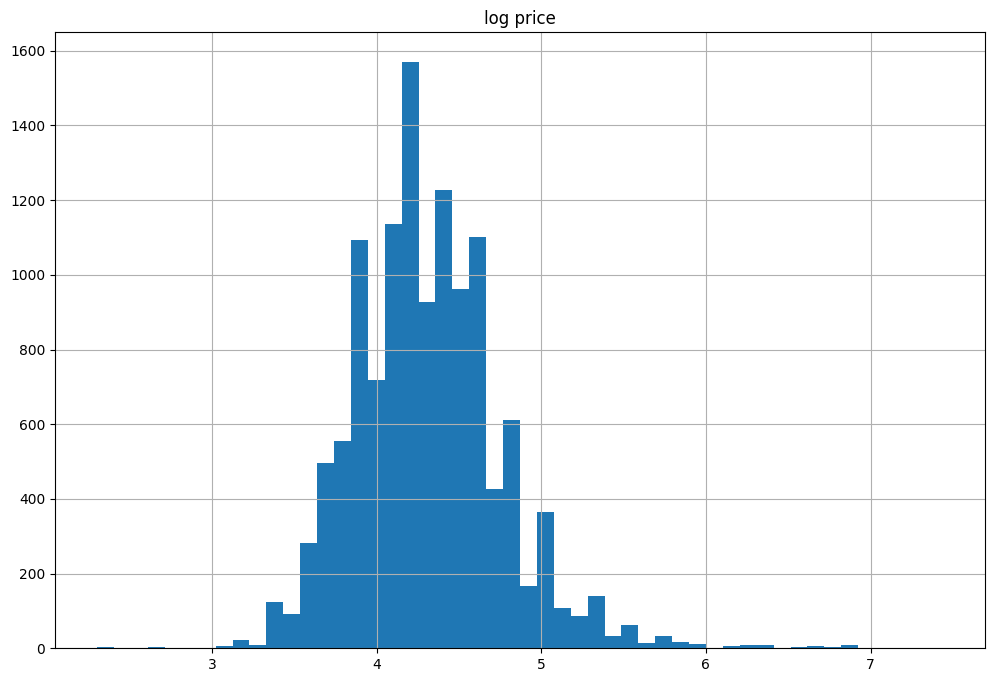

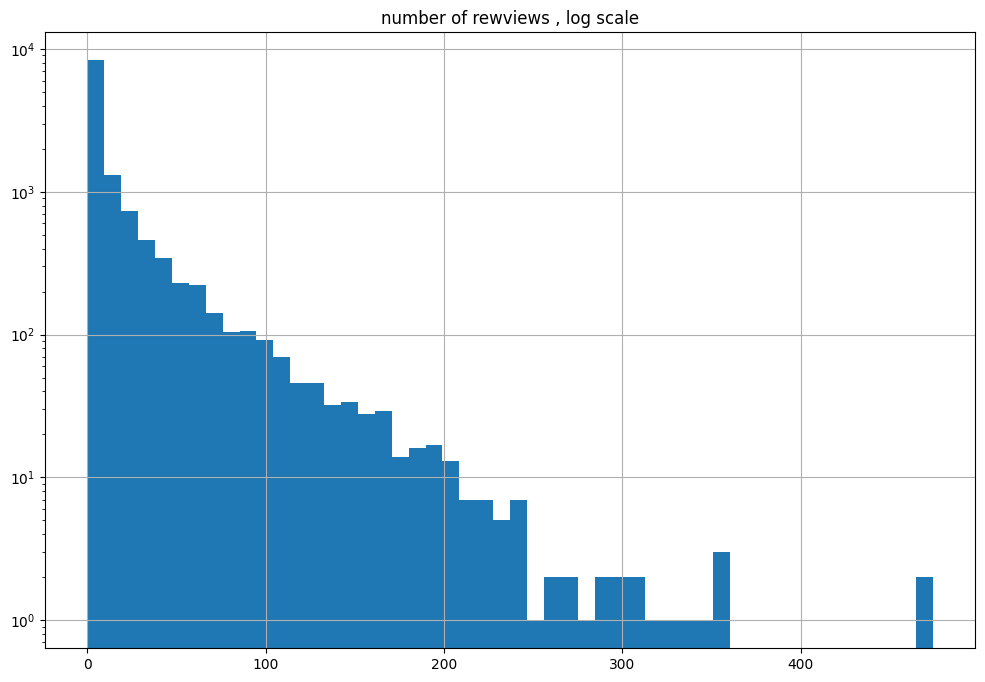

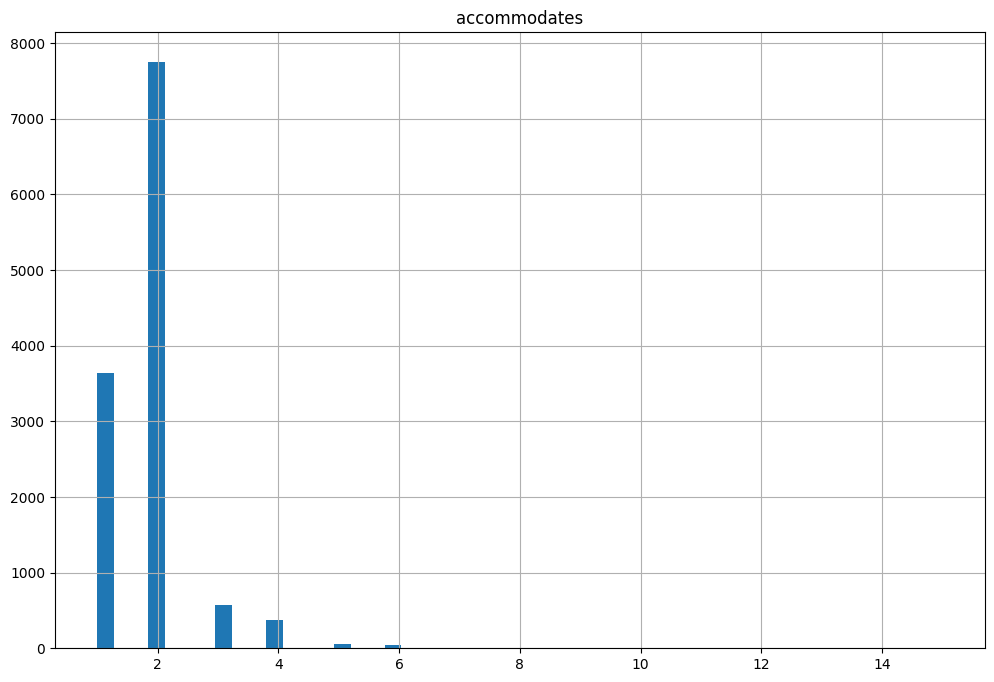

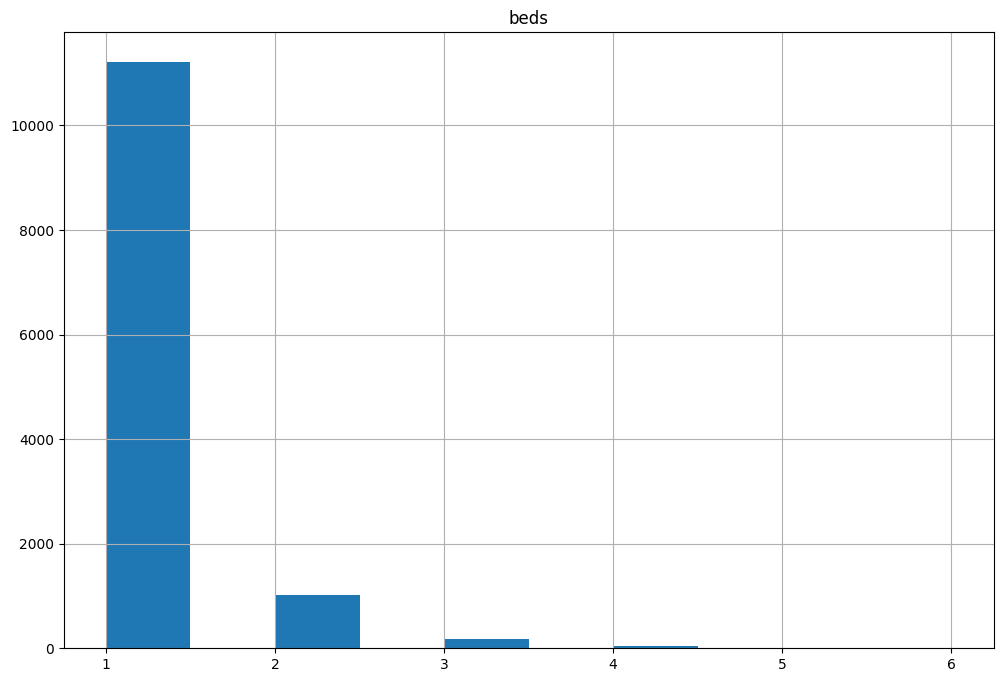

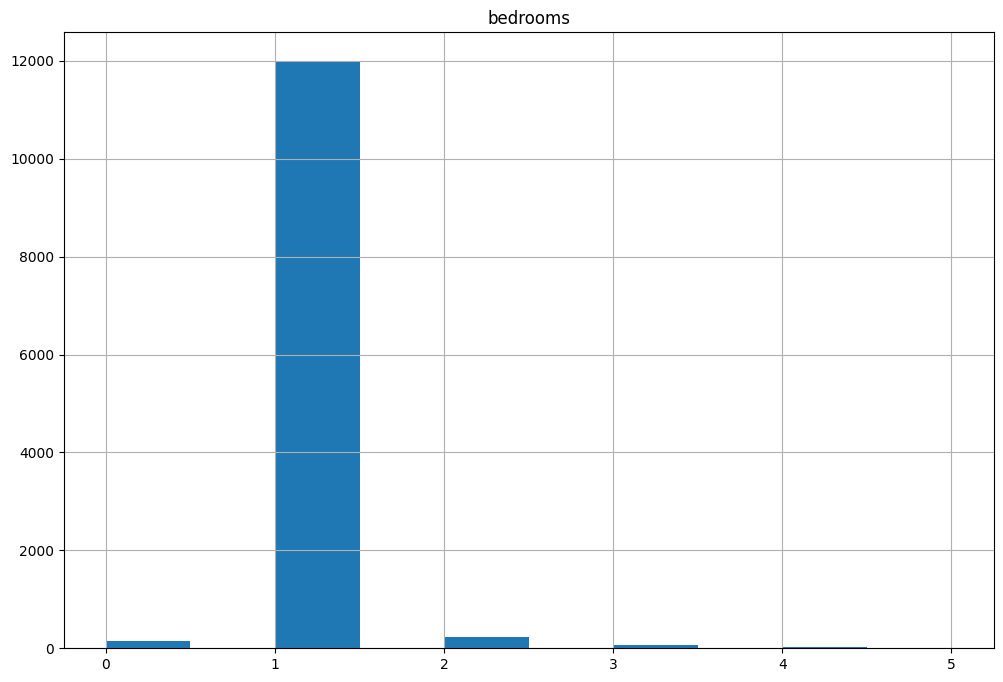

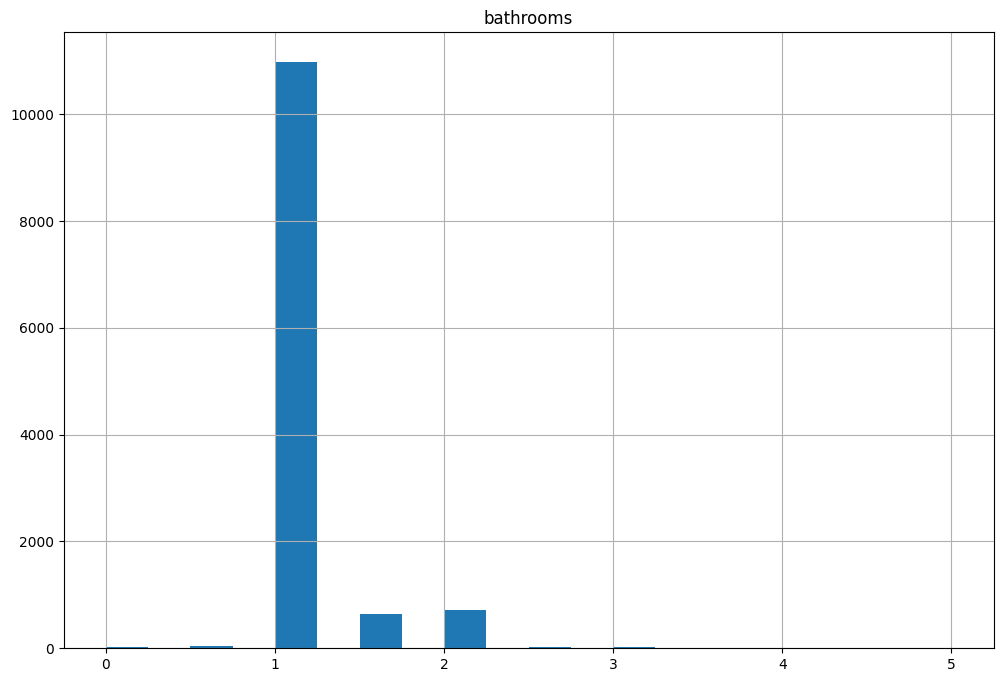

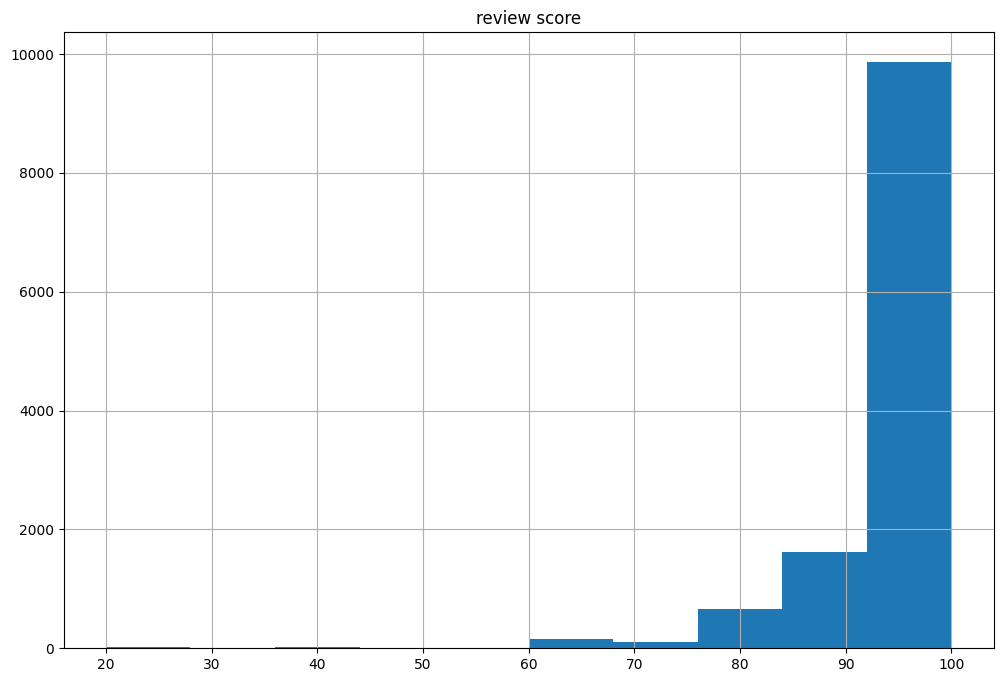

In [102]:
plt.figure(figsize=(12,8))
df_nyc_private['log_price'].hist(bins=50)
plt.title('log price')
plt.show()

plt.figure(figsize=(12,8))
df_nyc_private['number_of_reviews'].hist(bins=50)
plt.yscale('log')
plt.title('number of rewviews , log scale')
plt.show()

plt.figure(figsize=(12,8))
df_nyc_private['accommodates'].hist(bins=50)
plt.title('accommodates')
plt.show()

plt.figure(figsize=(12,8))
df_nyc_private['beds'].hist()
plt.title('beds')
plt.show()

plt.figure(figsize=(12,8))
df_nyc_private['bedrooms'].hist()
plt.title('bedrooms')
plt.show()

plt.figure(figsize=(12,8))
df_nyc_private['bathrooms'].hist(bins=20)
plt.title('bathrooms')
plt.show()

plt.figure(figsize=(12,8))
df_nyc_private['review_scores_rating'].hist()
plt.title('review score')
plt.show()



### countplot for categorical values

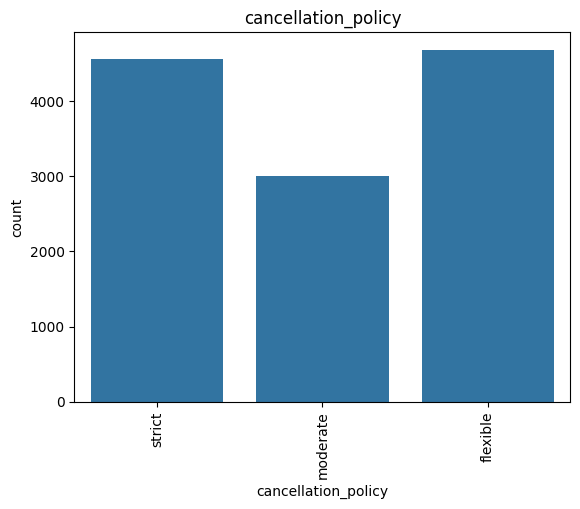

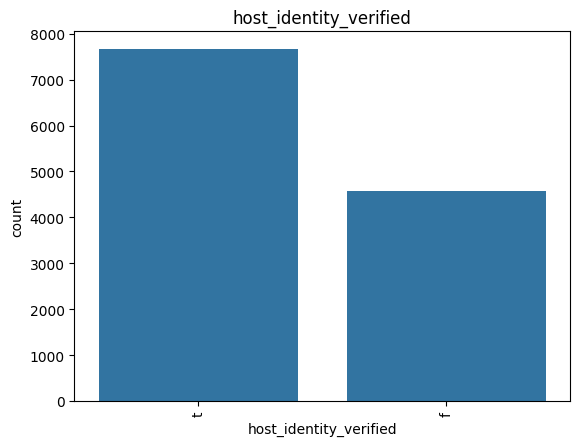

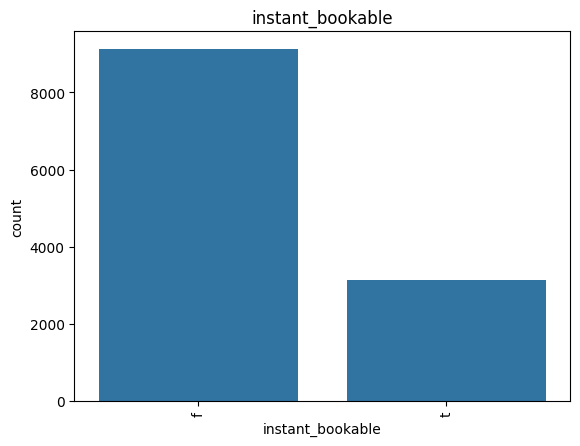

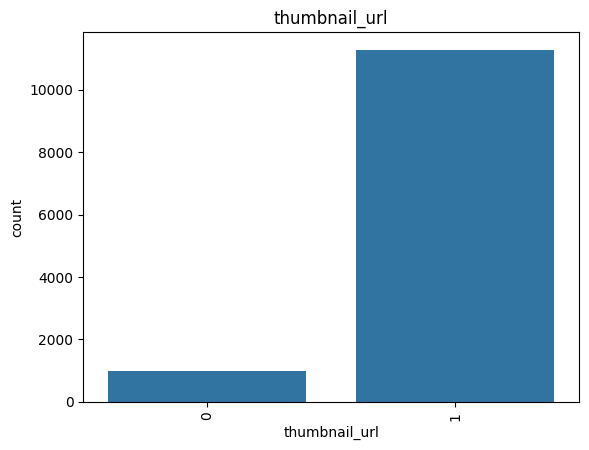

In [141]:

for col in [ 
'cancellation_policy' ,
'host_identity_verified' ,
'instant_bookable',
'thumbnail_url']:
    sns.countplot(data=df_nyc_private,x=col)
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show()



### Boxplot visualizing outliers

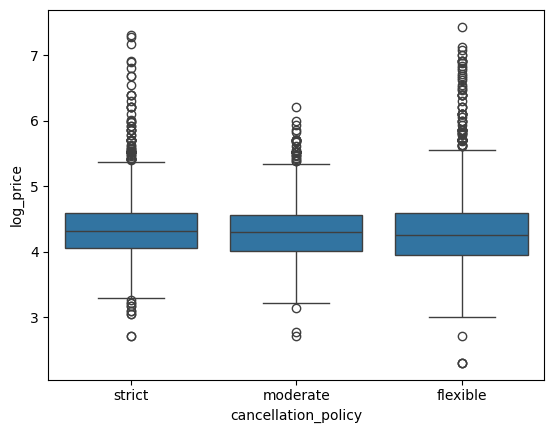

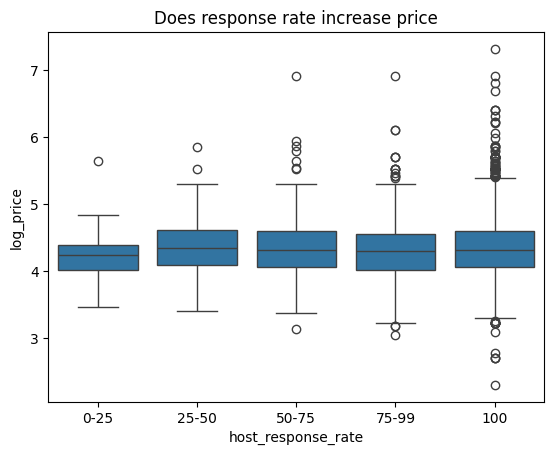

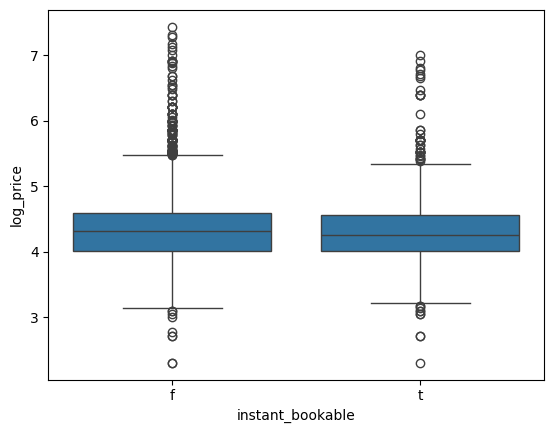

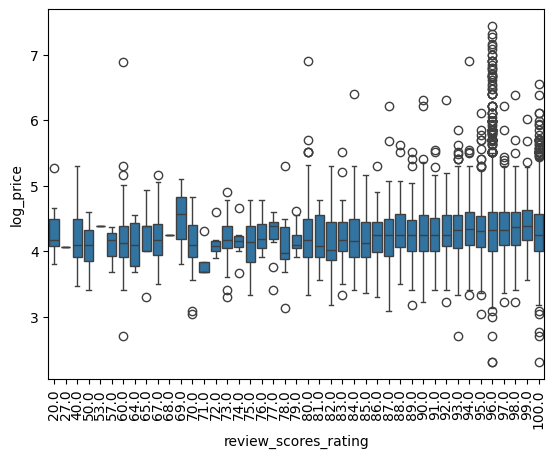

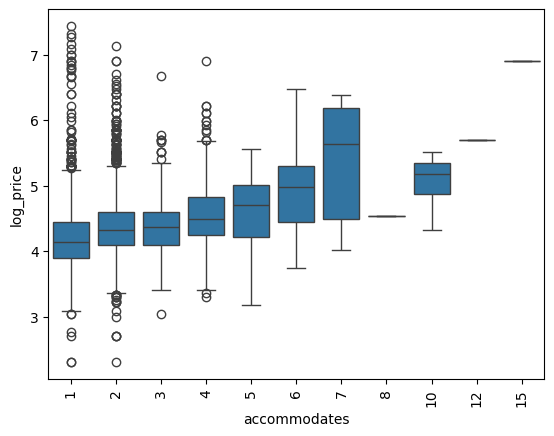

<Axes: ylabel='log_price'>

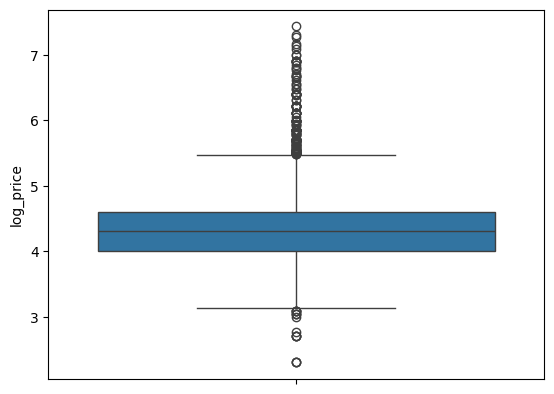

In [104]:
sns.boxplot(data=df_nyc_private,x='cancellation_policy',y='log_price')
plt.show()


sns.boxplot(data=df_nyc_private,x=pd.cut(df_nyc_private['host_response_rate'],bins=[0,25,50,75,99,100],labels=['0-25','25-50','50-75','75-99','100']
),y='log_price')


plt.title('Does response rate increase price')
plt.show()


sns.boxplot(data=df_nyc_private,x='instant_bookable',y='log_price')
plt.show()


sns.boxplot(data=df_nyc_private,x='review_scores_rating',y='log_price')
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=df_nyc_private,x='accommodates',y='log_price')
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=df_nyc_private,y='log_price')


## Drop price outliers

In [105]:

# remove outliers based on quartiles
Q1 = df_nyc_private['log_price'].quantile(0.25)
Q3 = df_nyc_private['log_price'].quantile(0.75)
IQR = Q3 - Q1
df_nyc_private = df_nyc_private[(df_nyc_private['log_price'] >= Q1 - 1.5 * IQR) & (df_nyc_private['log_price'] <= Q3 + 1.5 * IQR)]


### Heatmap plot

<Axes: >

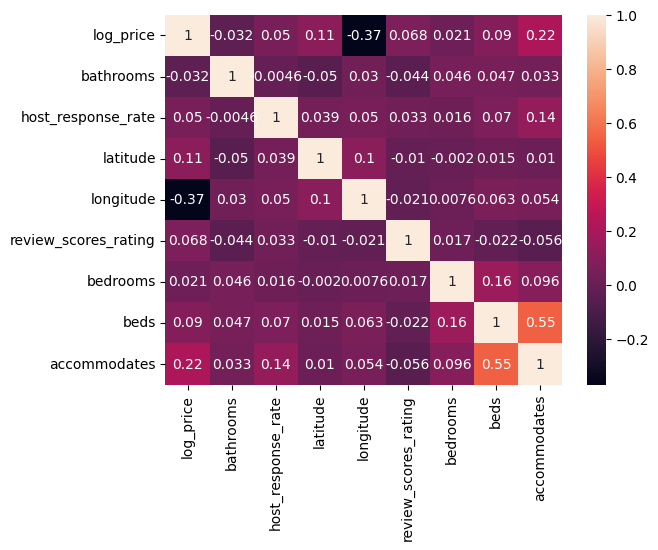

In [143]:
sns.heatmap(df_nyc_private[df_nyc_private.select_dtypes(include=['float64']).columns.tolist() + ['accommodates']].corr(),annot=True)


<Axes: >

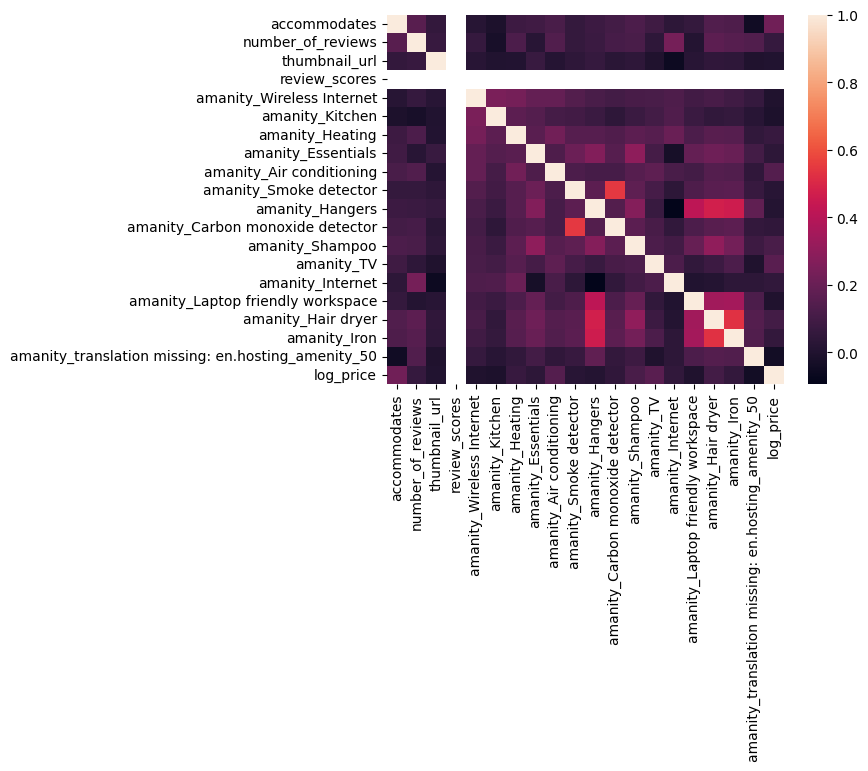

In [107]:
sns.heatmap(df_nyc_private[df_nyc_private.select_dtypes(include=['int64']).columns.tolist() + ['log_price']].corr())


# Modeling
From the correlation matrix the price correlates the most with *longitude* and *latitude*, to find out if location is the only thing that matters when predicting the price, two random forest models will be trained. One **with location data** and **one without**, to determine if price can vary with factors that the host has control over. 

Random forest regressor was choosen with a 80/20 split for predicting the continous price value. The random forest with its many trees will be able to catch the *importance* of which features impact on the *log price*.

## Transform data
Columns *cleaning_fee*, *host_identity_verified* ,*instant_bookable* transform from bool and object to boolean using encoding from pandas, ``get_dummies`` method.


## Drop unnecessary columns
Drop columns  *thumbnail url* since majority have a thumbnail and the correlation was low.
*longitude* and *latitude* makes *neigbourhood* unecessary to include.
*Review scores* and *bathrroms* were heavaly skewed.


## Model
Used
- [Random forest](#random-forest)
    - [Random forest scoring](#random-forest-scoring)
    - [Random forest parameter tuning with gridsearch](#random-forest-apply-parameter-tuning)
    - [Random forest apply parameter tuning](#random-forest-apply-parameter-tuning)
    - [Random forest Scoring after tuning](#scoring-after-parameter-tuning)
- [Random forest with location](#random-forest-with-location)
    - [Random forest scoring](#random-forest-wlocation-scoring)
    - [Random forest parameter tuning with gridsearch](#random-forest-gridsearch-parameter-tuning-with-location)
    - [Random forest apply tuning](#random-forest-apply-parameter-tuning-with-location)
    - [Random forest scoring after tuning with location](#random-forest-scoring-with-parameter-tuning-and-locaiton)

In [108]:
df_encoded = pd.get_dummies(df_nyc_private,columns=['cancellation_policy','cleaning_fee','host_identity_verified','instant_bookable'],drop_first=True)

In [109]:
# copy 
df_model = df_encoded.copy()

# 
df_model_wlocation = df_model.drop(['host_since','bathrooms','thumbnail_url','review_scores','neighbourhood'],axis=1)
df_model_no_location = df_model.drop(['host_since','bathrooms','thumbnail_url','review_scores','neighbourhood','longitude','latitude'],axis=1)


## Random Forest

In [ ]:
# Predict price, without location data
X = df_model_no_location.drop('log_price',axis=1)
y = df_model_no_location['log_price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    n_jobs=-1,
    max_features=0.3
)

rf.fit(X_train,y_train)
pred = rf.predict(X_test)

rf r2 0.07670650518493505
CV mean: 0.08532401642646403
CV std: 0.021339041831262527


#### Random forest scoring

In [ ]:

# how much variance of the variance the model explains 
print("rf r2, how much of variance is explained by model", r2_score(y_test,pred))

# How wrong the model is on avr
mae = mean_absolute_error(y_test, pred)
print("MAE:", mae)
# How far away the wrong answar is
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE:", rmse)


# Cross validation , 5 folds
cv_r2 = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Cross Validate mean:", cv_r2.mean())
print("Cross Validate std:", cv_r2.std())

RMSE: 0.3745621651776162
MAE: 0.2969240651759506
MAE CV mean: 0.3027569885422742
RMSE CV mean: 0.38019781834684574


In [118]:
importances = rf.feature_importances_
importances

array([0.0636196 , 0.06540472, 0.14685961, 0.10279102, 0.01682394,
       0.02027706, 0.00949153, 0.01849253, 0.02044141, 0.02602414,
       0.025634  , 0.0277583 , 0.0313195 , 0.03702158, 0.02728984,
       0.02898303, 0.03690791, 0.03629083, 0.02827333, 0.03225631,
       0.03499219, 0.02716062, 0.0309677 , 0.0322126 , 0.0400473 ,
       0.03265937])

#### Random forest Parameter tuning with gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 500, 1000, 2000],
    "max_depth": [None, 5, 10, 15, 20, 30],
    "min_samples_leaf": [1, 2, 3, 5, 10],
}

grid = GridSearchCV(
    rf,
    param_grid=param_grid,
    scoring="r2",
)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 500}
0.11542683513156356


#### Random forest apply parameter tuning

In [ ]:
rf = RandomForestRegressor(
    n_estimators=1000,
    max_depth=10,
    min_samples_leaf=3
)

rf.fit(X_train,y_train)
pred = rf.predict(X_test)


#### Scoring after parameter tuning

In [ ]:
# how much variance of the variance the model explains 
print("rf r2, how much of variance is explained by model", r2_score(y_test,pred))

# How wrong the model is on avr
mae = mean_absolute_error(y_test, pred)
print("MAE:", mae)
# How far away the wrong answar is
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE:", rmse)


# Cross validation , 5 folds
cv_r2 = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Cross Validate mean:", cv_r2.mean())
print("Cross Validate std:", cv_r2.std())

rf r2 0.09046068166004351
CV mean: 0.10750968569654647
CV std: 0.0170398122217264


### Random forest with location

In [122]:
X = df_model_wlocation.drop('log_price',axis=1)
y = df_model_wlocation['log_price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

rf_loc = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    n_jobs=-1,
    max_features=0.3

)

rf_loc.fit(X_train,y_train)
pred = rf_loc.predict(X_test)



#### Random forest w/location Scoring

In [ ]:
# how much variance of the variance the model explains 
print("rf r2, how much of variance is explained by model", r2_score(y_test,pred))

# How wrong the model is on avr
mae = mean_absolute_error(y_test, pred)
print("MAE:", mae)
# How far away the wrong answar is
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE:", rmse)


# Cross validation , 5 folds
cv_r2 = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Cross Validate mean:", cv_r2.mean())
print("Cross Validate std:", cv_r2.std())

rf r2 0.3681800914840345
CV mean: 0.39607984402654217
CV std: 0.003635029258515525
MAE: 0.23815695250908767
RMSE: 0.3098494090084075


#### Random forest gridsearch parameter tuning with location

In [124]:
param_grid = {
    "n_estimators": [100, 500, 1000, 2000],
    "max_depth": [None, 5, 10, 15, 20, 30],
    "min_samples_leaf": [1, 2, 3, 5, 10],
}

grid = GridSearchCV(
    rf_loc,
    param_grid=param_grid,
    scoring="r2",
)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 1000}
0.3996491946274042


#### Random forest apply parameter tuning with location

In [ ]:
rf_loc = RandomForestRegressor(
    n_estimators=1000,
    max_depth=20,
    min_samples_leaf=1
)

rf_loc.fit(X_train,y_train)
pred = rf_loc.predict(X_test)



#### Random forest scoring with parameter tuning and locaiton

In [ ]:
# how much variance of the variance the model explains 
print("rf r2, how much of variance is explained by model", r2_score(y_test,pred))

# How wrong the model is on avr
mae = mean_absolute_error(y_test, pred)
print("MAE:", mae)
# How far away the wrong answar is
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE:", rmse)


# Cross validation , 5 folds
cv_r2 = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Cross Validate mean:", cv_r2.mean())
print("Cross Validate std:", cv_r2.std())

rf r2 0.35536350609225964
CV mean: 0.3831211878706832
CV std: 0.002103565454103301


# Evaluate the model
Are these findings significant?

## Evaluation with location

In [128]:
import statsmodels.api as sm

bool_cols = df_model_wlocation.select_dtypes(include=['bool']).columns
df_model_wlocation[bool_cols] = df_model_wlocation[bool_cols].astype(int)

X = df_model_wlocation.drop('log_price', axis=1)
y = df_model_wlocation['log_price']

# Add constant (intercept)
X_ols = sm.add_constant(X)

model = sm.OLS(y, X_ols).fit()
print(model.summary())





                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     150.0
Date:                Sat, 06 Dec 2025   Prob (F-statistic):               0.00
Time:                        14:42:10   Log-Likelihood:                -4291.4
No. Observations:               12251   AIC:                             8641.
Df Residuals:                   12222   BIC:                             8856.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

## Evaluation without location

In [ ]:
bool_cols = df_model_no_location.select_dtypes(include=['bool']).columns
df_model_no_location[bool_cols] = df_model_no_location[bool_cols].astype(int)

X = df_model_no_location.drop('log_price', axis=1)
y = df_model_no_location['log_price']

X_ols = sm.add_constant(X)

model = sm.OLS(y, X_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     54.23
Date:                Sat, 06 Dec 2025   Prob (F-statistic):          1.50e-265
Time:                        14:42:10   Log-Likelihood:                -5432.0
No. Observations:               12251   AIC:                         1.092e+04
Df Residuals:                   12224   BIC:                         1.112e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

# Deploy the model
Determine the price of our room.

In [ ]:
my_room = {
    'accommodates':1, 
    'host_response_rate': 0, 
    'number_of_reviews': 0,
    'review_scores_rating' : 0,
    'bedrooms': 0,
    'beds': 0, 
    'amanity_Wireless Internet': 0,
    'amanity_Kitchen': 0, 
    'amanity_Heating': 0, 
    'amanity_Essentials': 0,
    'amanity_Air conditioning': 0, 
    'amanity_Smoke detector': 0, 
    'amanity_Hangers': 0,
    'amanity_Carbon monoxide detector': 0, 
    'amanity_Shampoo': 0, 
    'amanity_TV': 0,
    'amanity_Internet': 0, 
    'amanity_Laptop friendly workspace': 0,
    'amanity_Hair dryer': 0, 
    'amanity_Iron': 0,
    'amanity_translation missing: en.hosting_amenity_50': 0,
    'cancellation_policy_moderate': 0,
    'cancellation_policy_strict':1,
    'cleaning_fee_True': 0,
    'host_identity_verified_t': 0, 
    'instant_bookable_t': 0,
}

my_room = pd.DataFrame([my_room])

what_myroomworth = rf.predict(my_room)

print("the pris is",what_myroomworth)

the pris is [4.12901449]


## Predicted price vs Actual price



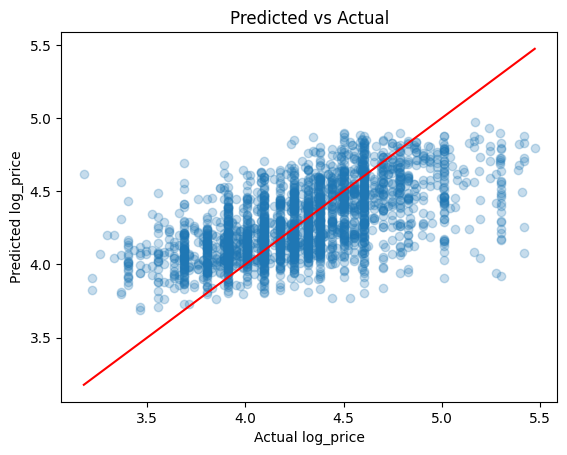

In [140]:
plt.scatter(y_test, pred, alpha=0.25)
plt.xlabel("Actual log_price")
plt.ylabel("Predicted log_price")
plt.title("Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.show()


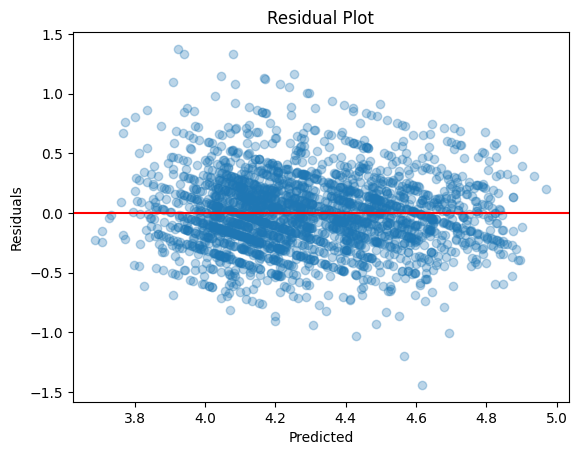

In [132]:
plt.scatter(pred, y_test - pred, alpha=0.3)
plt.axhline(0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


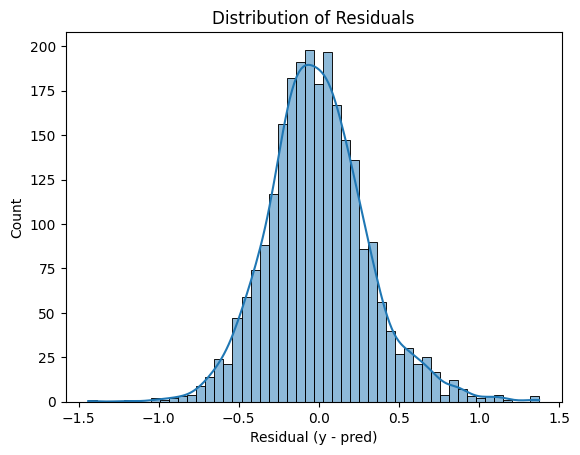

In [137]:
sns.histplot(y_test - pred, bins=50, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual (y - pred)")
plt.show()


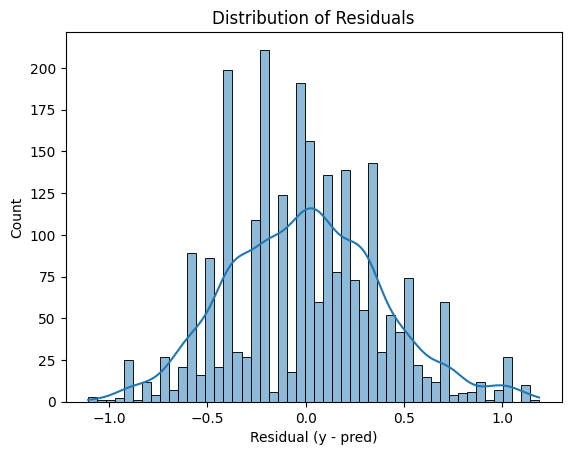

In [135]:
sns.histplot(y_test - y_test.mean(), bins=50, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual (y - pred)")
plt.show()


## What can be added to increase our predicted price